In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Metricas
from sklearn.metrics import classification_report, jaccard_score, roc_auc_score, f1_score, recall_score, precision_score, accuracy_score

In [2]:
df = pd.read_csv("C:/Users/lyes_/Desktop/Second Project Hab/second-project/data/DataSetFallosMaquina.csv", sep = ';')
df

,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure
0,67,82,Operator1,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90,No
1,68,77,Operator1,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91,No
2,64,76,Operator1,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92,No
3,63,80,Operator1,550,1,1,1754,1834,1413,1151,945,1312,1494,1755,1434,502,1336,711,93,No
4,65,81,Operator1,1928,1,2,1326,1082,233,1441,1736,1033,1549,802,1819,1616,1507,507,94,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,66,79,Operator8,937,0,2,1875,1719,219,748,1901,819,546,901,1512,1477,537,410,7,No
8780,60,77,Operator8,379,3,0,814,1990,1606,1346,962,875,1067,608,251,1476,522,943,8,No
8781,61,77,Operator8,595,3,1,1659,1134,1314,907,1119,1623,272,1149,1951,1835,1554,200,9,No
8782,72,81,Operator8,1038,3,2,254,1400,564,216,1011,1909,502,470,1331,1696,229,1192,10,No


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Temperature                   8784 non-null   int64 
 1   Humidity                      8784 non-null   int64 
 2   Operator                      8784 non-null   object
 3   Measure1                      8784 non-null   int64 
 4   Measure2                      8784 non-null   int64 
 5   Measure3                      8784 non-null   int64 
 6   Measure4                      8784 non-null   int64 
 7   Measure5                      8784 non-null   int64 
 8   Measure6                      8784 non-null   int64 
 9   Measure7                      8784 non-null   int64 
 10  Measure8                      8784 non-null   int64 
 11  Measure9                      8784 non-null   int64 
 12  Measure10                     8784 non-null   int64 
 13  Measure11         

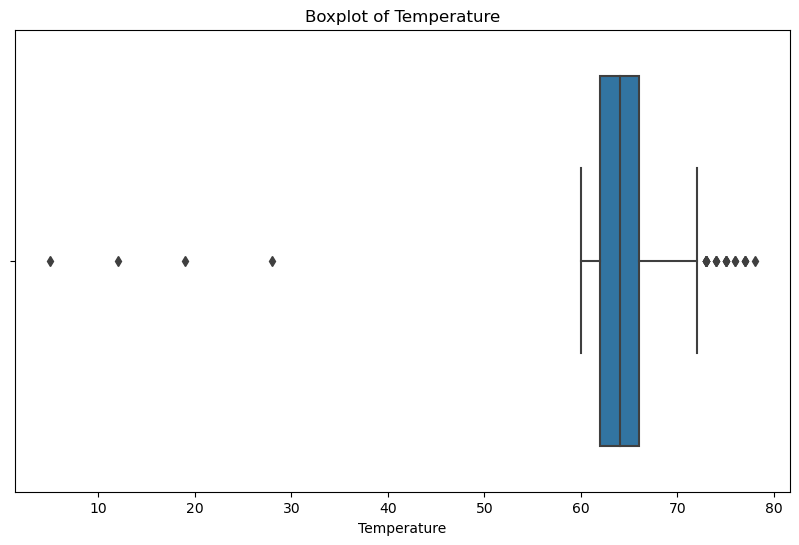

In [187]:
# Convert the variable temperature to numeric
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')

# Create a boxplot for 'Temperature'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Temperature'])
plt.title('Boxplot of Temperature')
plt.xlabel('Temperature')
plt.show()

In [188]:
# Calculo los cuartiles
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1

# Defino el criterio de los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifico los outliers
outliers = df[(df['Temperature'] < lower_bound) | (df['Temperature'] > upper_bound)]

print(outliers)

      Temperature  Humidity   Operator  Measure1  Measure2  Measure3  \
1392           12        79  Operator2      1975         1         2   
3015           73        88  Operator2       969         3         1   
3175           73        72  Operator1       999         0         1   
3316           28        82  Operator1      1686         3         2   
3756           75        85  Operator3      1122         2         0   
4590           73        72  Operator7      1745         3         0   
4593           74        69  Operator2       876         0         0   
4596           73        74  Operator2      1865         0         1   
4944           19        88  Operator7       344         1         2   
5118           77        77  Operator1      1558         0         0   
5165           73        89  Operator7       516         2         0   
5935           73        69  Operator2       725         3         1   
5937           75        68  Operator4      1222         0      

In [189]:
# Identify factor and integer variables
factor_vars = ['Operator', 'Measure2', 'Measure3', 'Failure']
int_vars = ['Temperature', 'Humidity', 'Measure1', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13', 'Measure14', 'Measure15', 'Hours Since Previous Failure']

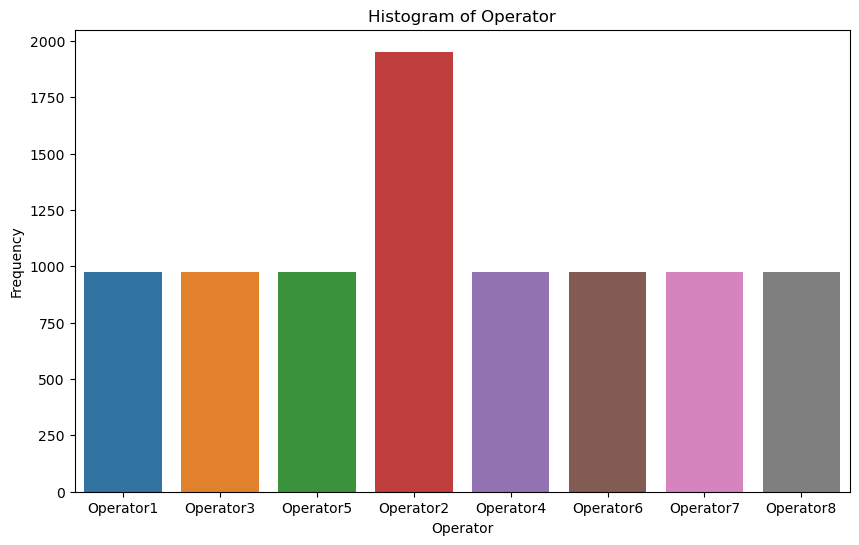

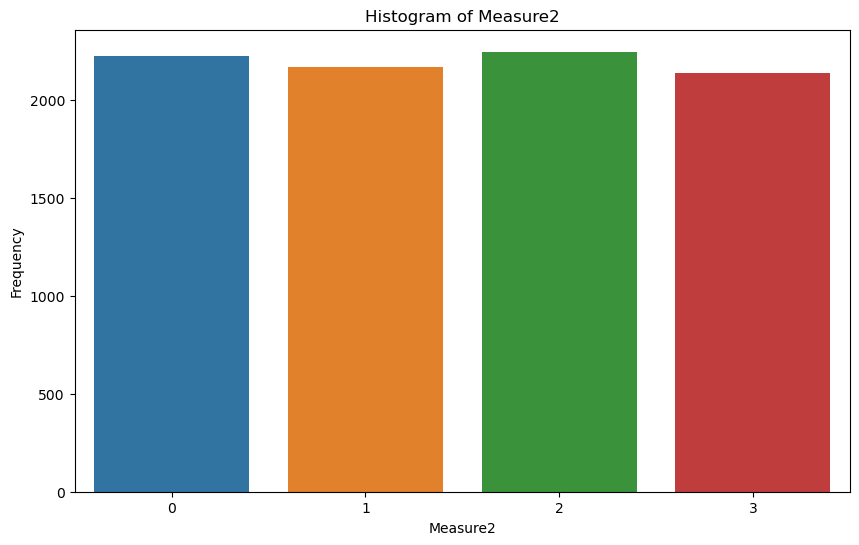

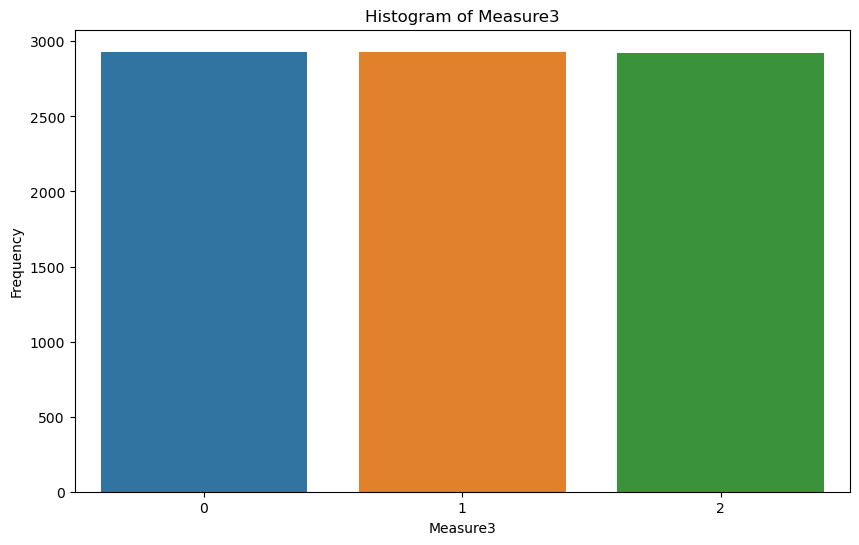

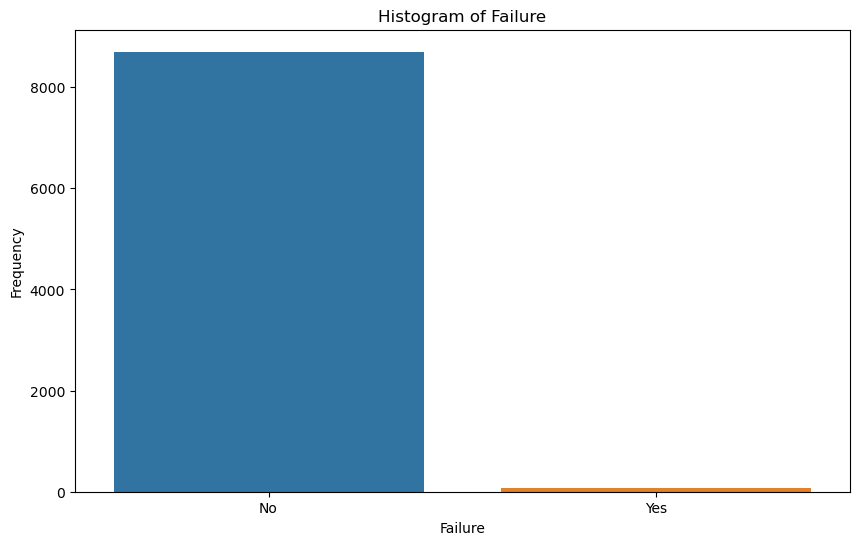

In [190]:
# Plot histograms for factor variables
for var in factor_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, data=df)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

### Factor Variables: We use a countplot to show the frequency of each category within these variables.

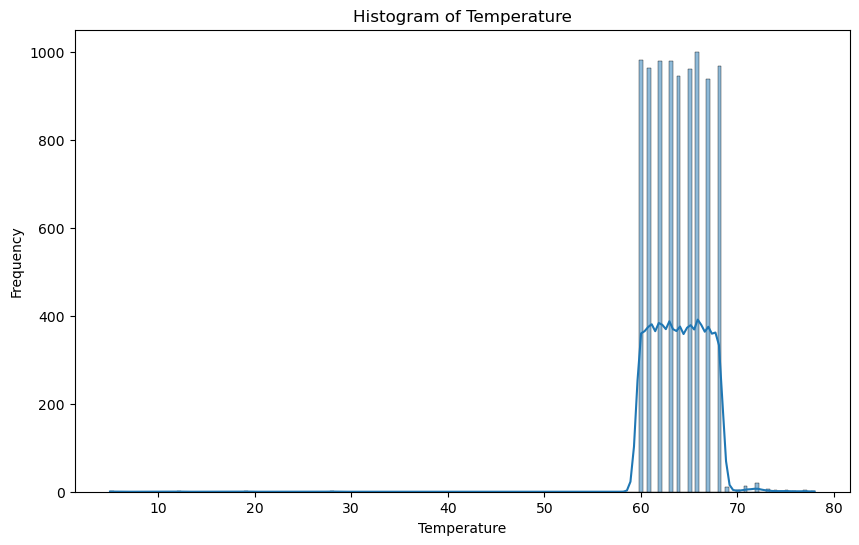

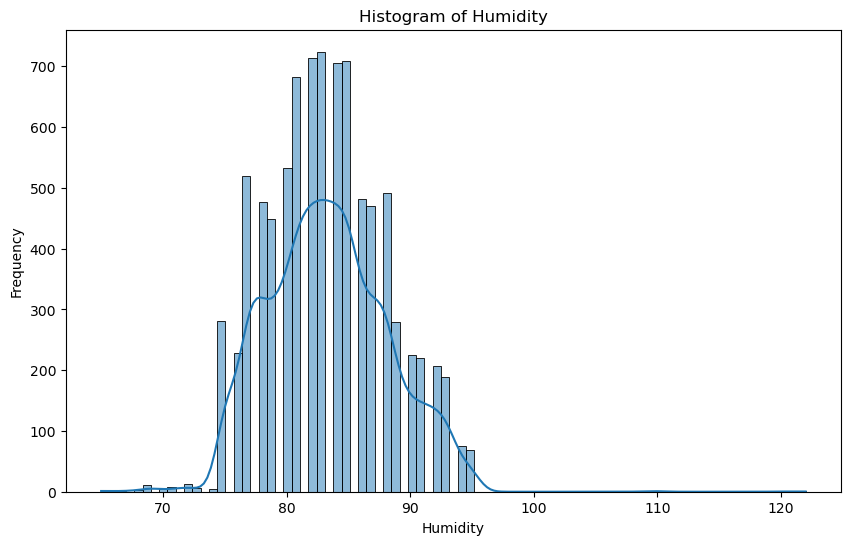

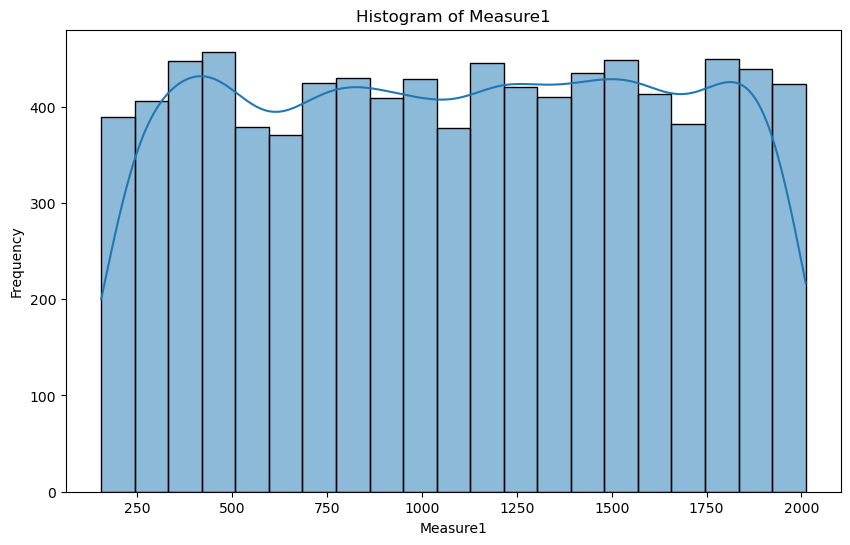

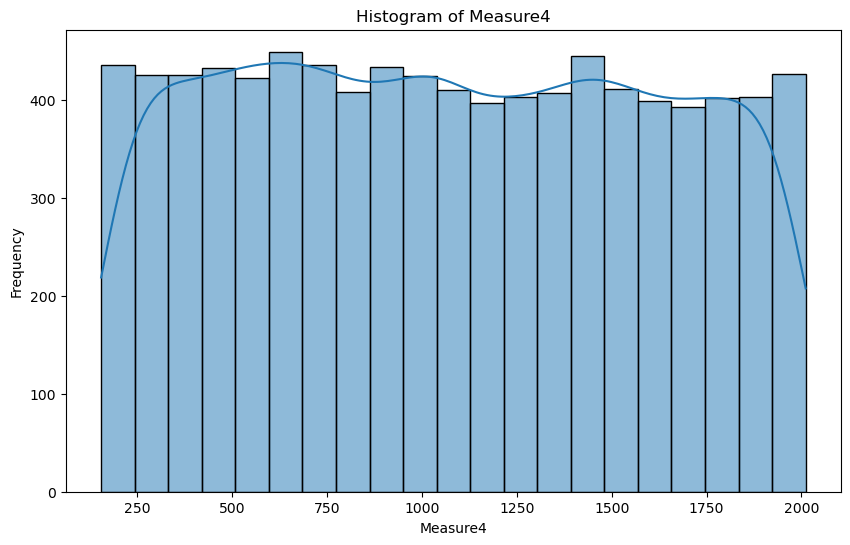

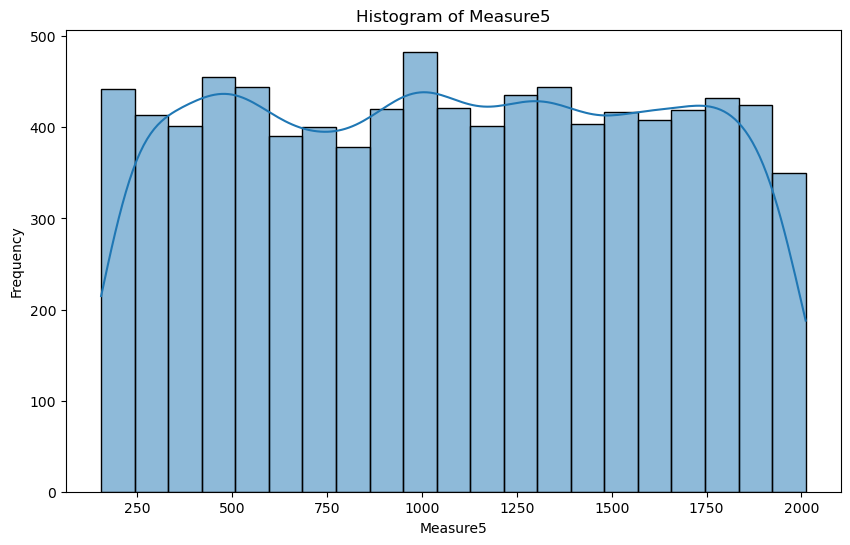

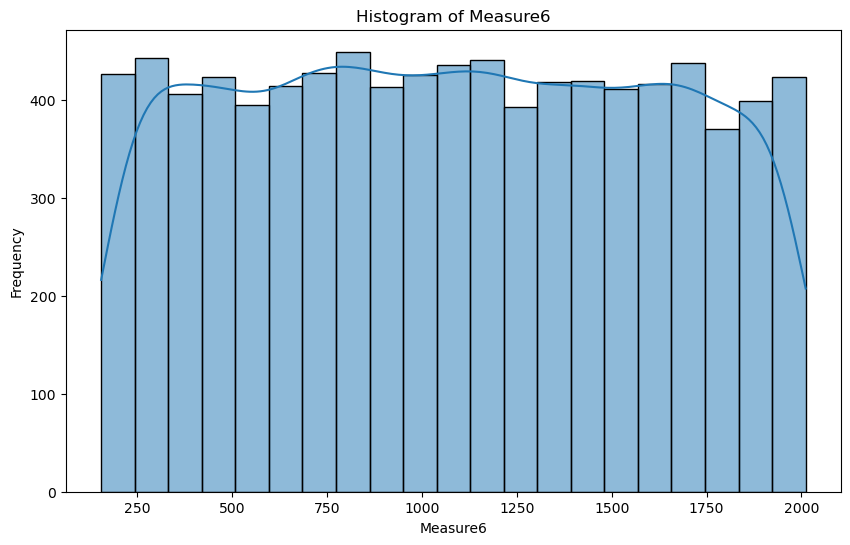

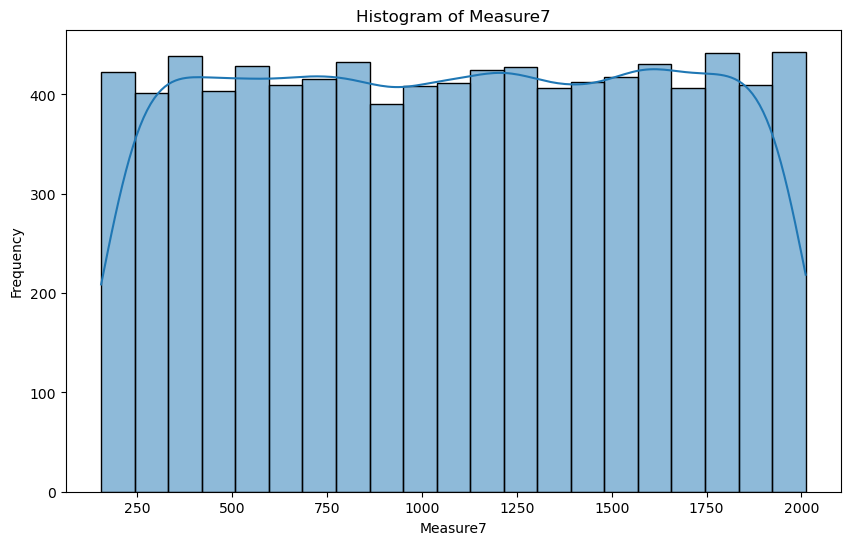

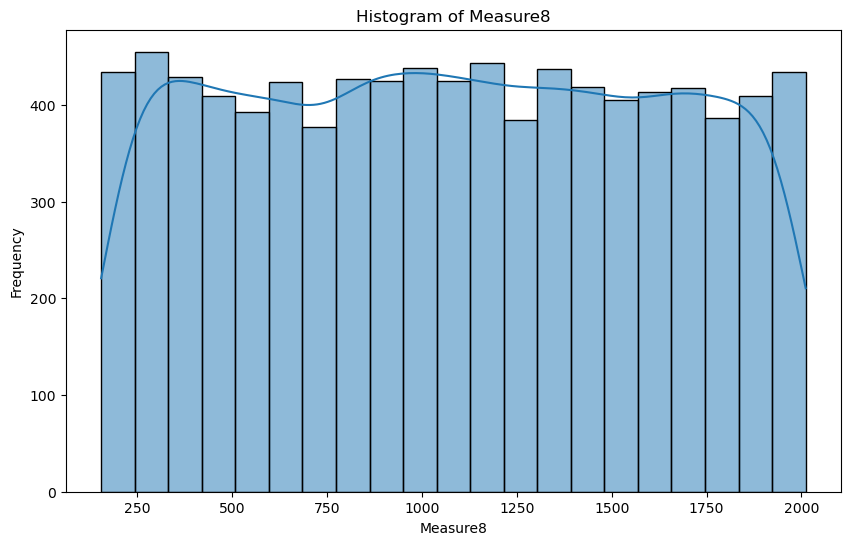

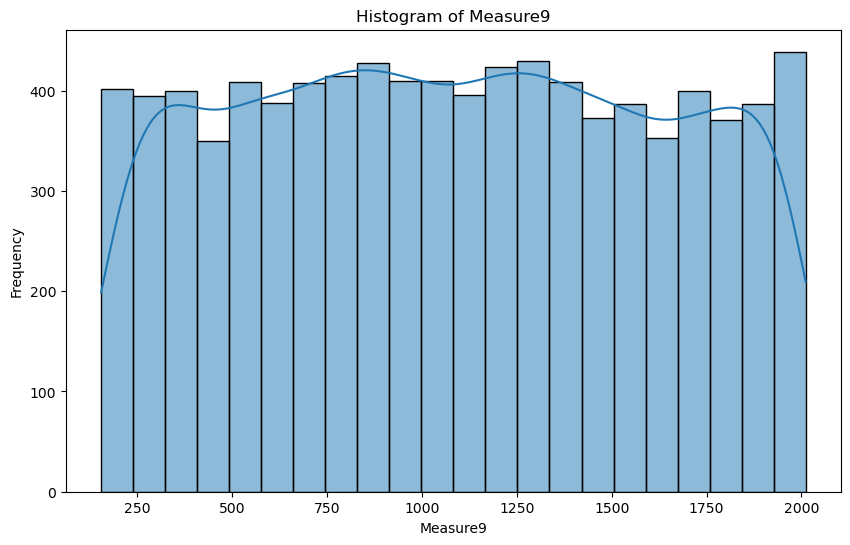

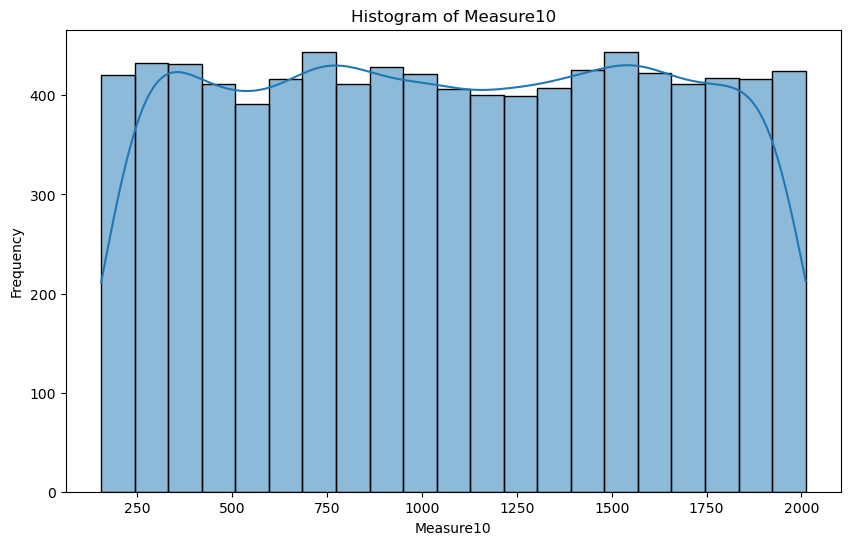

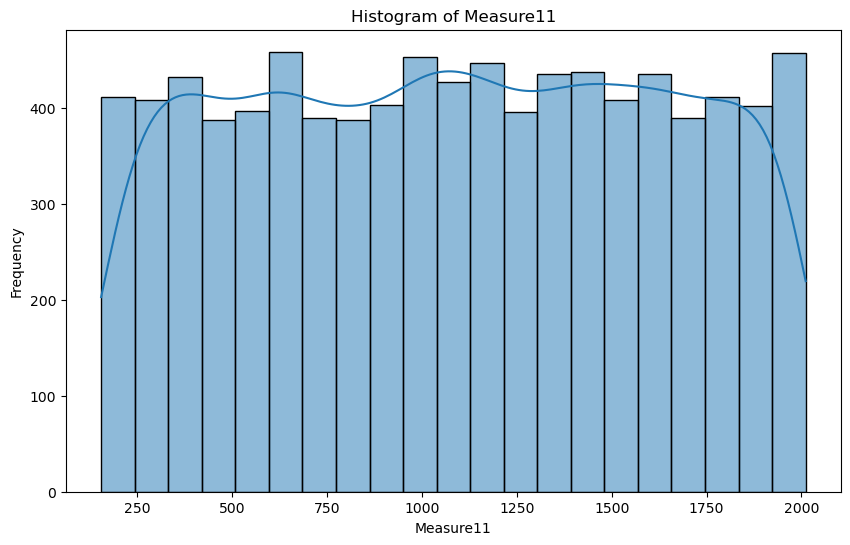

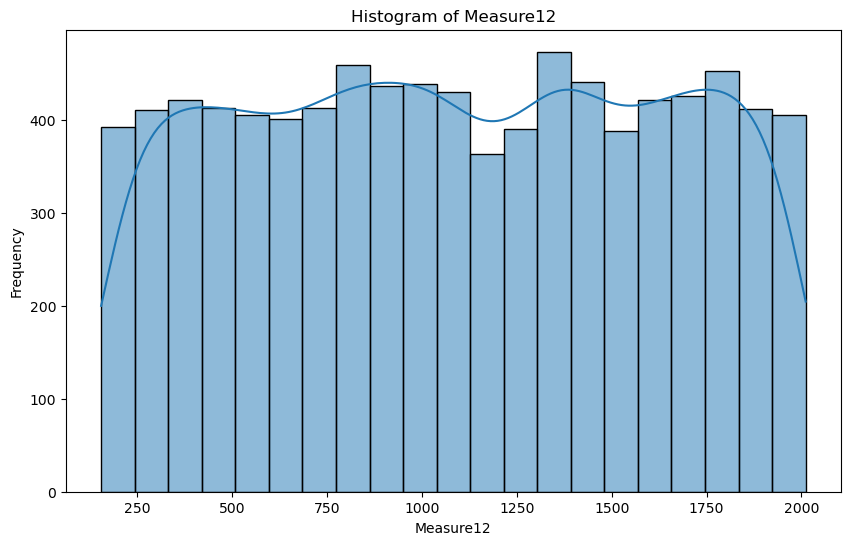

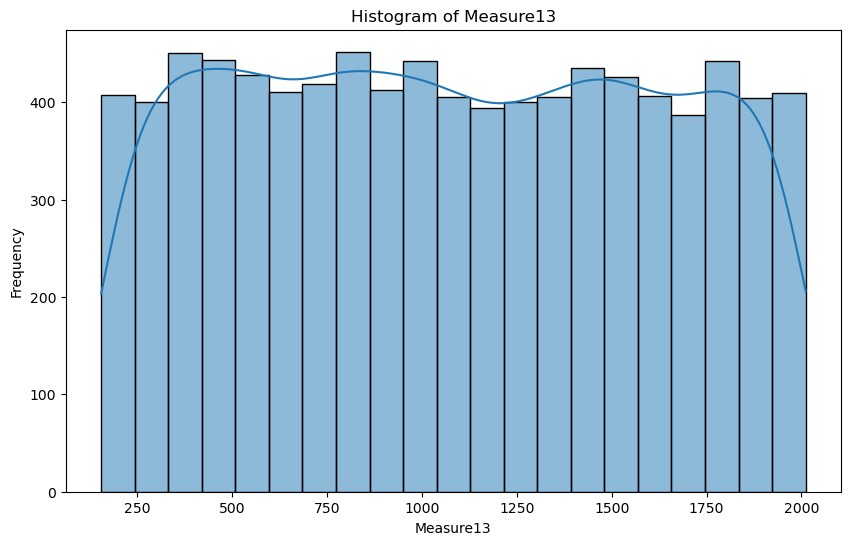

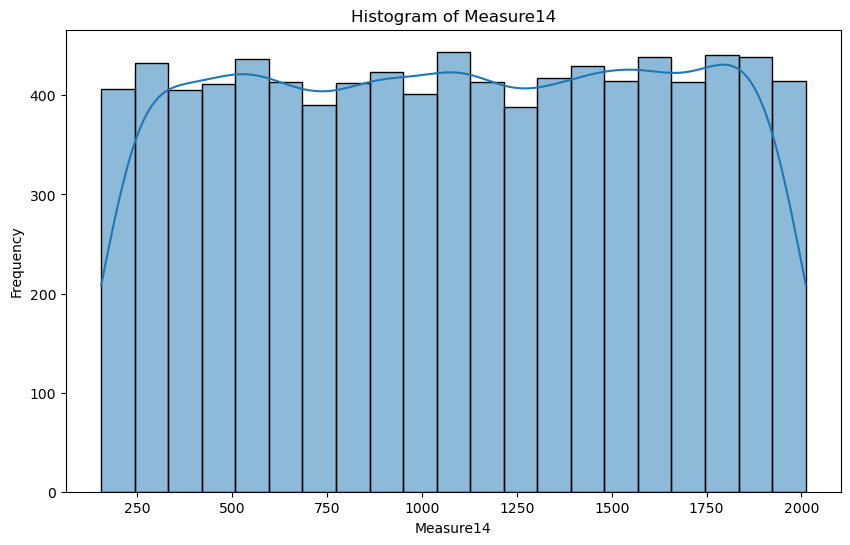

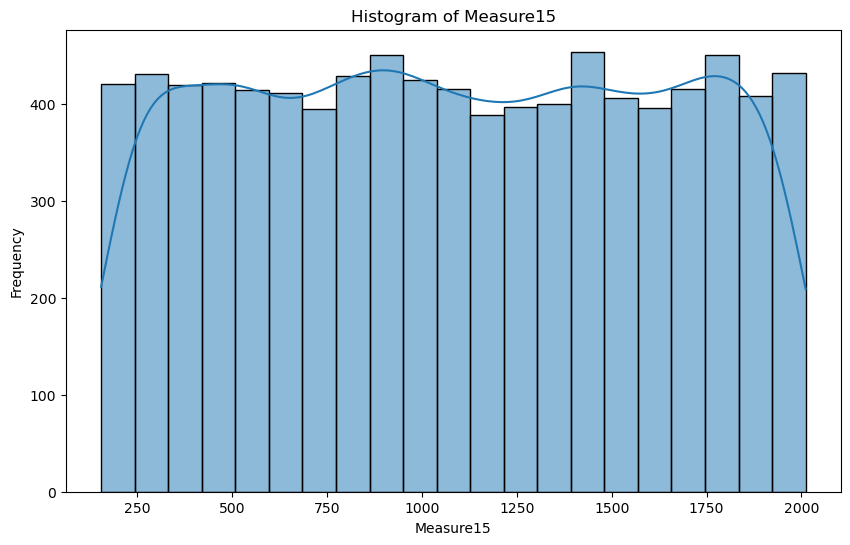

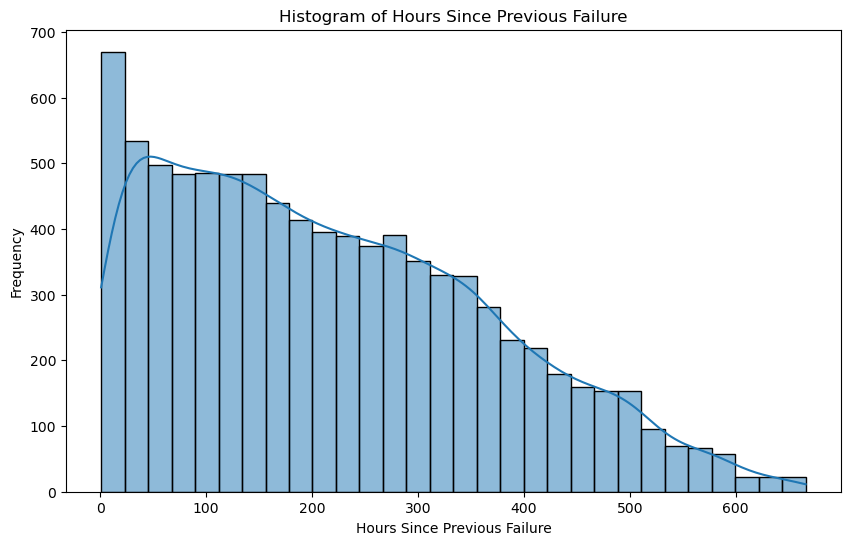

In [191]:
# Plot histograms for integer variables
for var in int_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

   ### Integer Variables: Here I use a histplot with a KDE (Kernel Density Estimate) to show the distribution of the data. This helps in understanding the central tendency, spread, and shape of the data distribution.

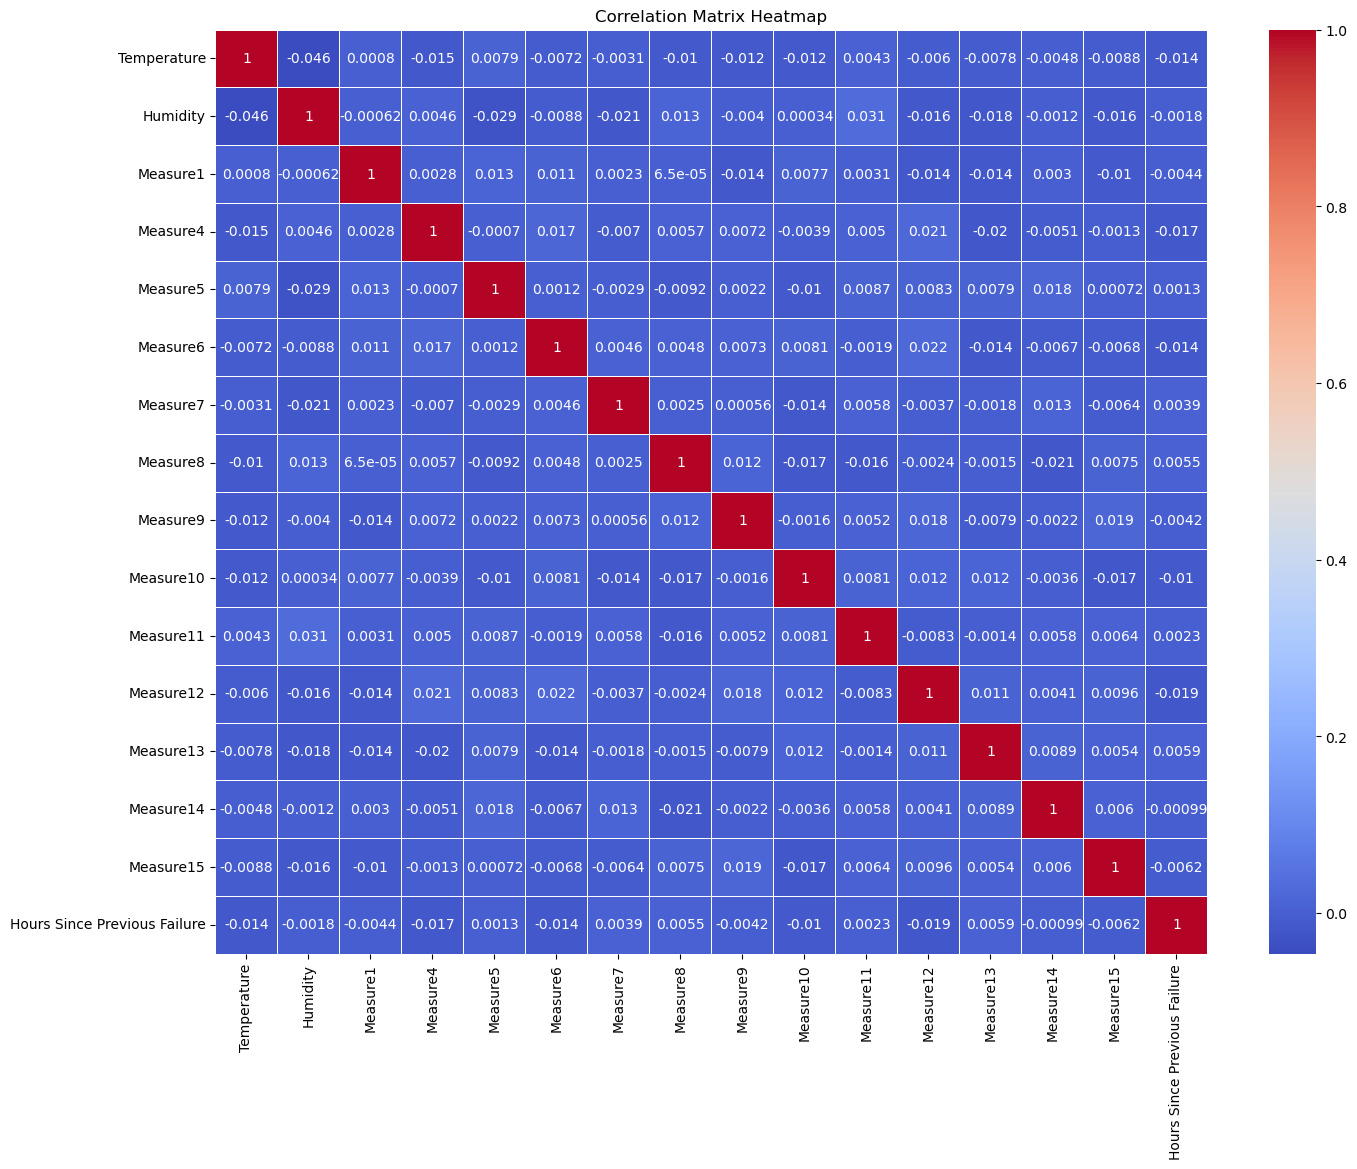

In [192]:
# I Select the numerical columns for correlation analysis
numerical_cols = ['Temperature', 'Humidity', 'Measure1', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 
                  'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13', 
                  'Measure14', 'Measure15', 'Hours Since Previous Failure']

# I Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# I Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [193]:
# Separate majority and minority classes
df_majority = df[df['Failure'] == 'No']
df_minority = df[df['Failure'] == 'Yes']

# Determine the desired number of samples in the majority class (80% of total samples)
n_minority = len(df_minority)
n_majority = int((4 * n_minority) / 1)  # approximately 80% No's and 20% Yes's

# Undersample the majority class
df_majority_undersampled = resample(df_majority, 
                                    replace=False,    # sample without replacement
                                    n_samples=n_majority,     # to match the desired 80% ratio
                                    random_state=42)  # reproducible results

# Combine minority class with undersampled majority class
df_balanced = pd.concat([df_majority_undersampled, df_minority])

# Check the new class distribution
print(df_balanced['Failure'].value_counts())

Failure
No     324
Yes     81
Name: count, dtype: int64


In [194]:
# Define the list of features and target variable
features = ['Temperature', 'Humidity', 'Measure1', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 
            'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13', 
            'Measure14', 'Measure15', 'Hours Since Previous Failure']
target = 'Failure'

# Split the data into features and target
X = df[features]
y = df[target]

# Encode the target variable into numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Create and train the logistic regression model
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42)
logistic_regression.fit(X_train, y_train)

# Obtain predictions
yhat = logistic_regression.predict(X_test)

# Evaluate the model
print(classification_report(y_test, yhat))
print("ROC-AUC Score:", roc_auc_score(y_test, yhat))

# Print the model coefficients
print("Coeficientes:", logistic_regression.coef_)
print("Intercepto:", logistic_regression.intercept_)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2616
           1       0.06      0.80      0.11        20

    accuracy                           0.90      2636
   macro avg       0.53      0.85      0.53      2636
weighted avg       0.99      0.90      0.94      2636

ROC-AUC Score: 0.8503058103975536
Coeficientes: [[ 3.08381060e-01 -2.88149608e-01  1.06426972e-04  3.75279384e-04
   1.66883225e-04  2.58016439e-04  1.84250428e-04  6.25768781e-04
  -1.04447965e-03  8.35698350e-04 -3.10672401e-04 -9.20467935e-05
   2.53855432e-04  5.80689690e-04  8.68077978e-05 -9.80030946e-04]]
Intercepto: [0.00063537]


c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [195]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[2356,  260],
       [   4,   16]], dtype=int64)

#### By these results I see and understand that we should only stay with the predictive variables and remove the ones which don't contribute with predictive information.

In [196]:
# Get the coefficients and corresponding feature names
coef_values = logistic_regression.coef_[0]
feature_names = X.columns

# Create a DataFrame to display coefficients and feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef_values})

# Sort the DataFrame by absolute coefficient values (to handle both positive and negative influence)
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print the DataFrame to inspect feature coefficients
print(coef_df)

# Remove features with coefficients close to zero
selected_features = coef_df[coef_df['Abs_Coefficient'] > 0.1]['Feature'].tolist()

                         Feature  Coefficient  Abs_Coefficient
0                    Temperature     0.308381         0.308381
1                       Humidity    -0.288150         0.288150
8                       Measure9    -0.001044         0.001044
15  Hours Since Previous Failure    -0.000980         0.000980
9                      Measure10     0.000836         0.000836
7                       Measure8     0.000626         0.000626
13                     Measure14     0.000581         0.000581
3                       Measure4     0.000375         0.000375
10                     Measure11    -0.000311         0.000311
5                       Measure6     0.000258         0.000258
12                     Measure13     0.000254         0.000254
6                       Measure7     0.000184         0.000184
4                       Measure5     0.000167         0.000167
2                       Measure1     0.000106         0.000106
11                     Measure12    -0.000092         0

In [197]:
# Defino un threshold para la magnitud de los coeficientes
threshold = 0.001

# Filtro y selecciono los features en base al coeficiente que he seleccionado justo encima
selected_features = coef_df[coef_df['Abs_Coefficient'] > threshold]['Feature'].tolist()

# Filtro el dataset con los features seleccionados
X_selected = X[selected_features]

# Split de los datos en training y test
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.30, random_state=42)

# entreno un nuevo modelo de regresión logística usando los features seleccionados
logistic_regression_selected = LogisticRegression(class_weight='balanced', random_state=42)
logistic_regression_selected.fit(X_train_selected, y_train)

#predicción
yhat_selected = logistic_regression_selected.predict(X_test_selected)

# Print del classification report and ROC-AUC score
print(classification_report(y_test, yhat_selected))
print("ROC-AUC Score:", roc_auc_score(y_test, yhat_selected))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2616
           1       0.06      0.80      0.11        20

    accuracy                           0.90      2636
   macro avg       0.53      0.85      0.53      2636
weighted avg       0.99      0.90      0.94      2636

ROC-AUC Score: 0.8499235474006117


In [198]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[2356,  260],
       [   4,   16]], dtype=int64)

#### Finally I will apply the model to our dataset, making a prediction taking into account the variables of the model over the total data and then contrast the prediction with reality.

In [199]:
# Prepare the data (assuming df contains your dataset)
X_dataset = df[selected_features]  # Use the selected features from the previous step

# Make predictions on the dataset
predictions = logistic_regression_selected.predict(X_dataset)

# Convert numerical labels back to categorical labels if needed
predicted_labels = label_encoder.inverse_transform(predictions)

# Add the predicted labels to the dataset for comparison
df['Predicted_Failure'] = predicted_labels

# Compare predicted labels with actual labels
comparison = pd.DataFrame({'Actual_Failure': df['Failure'], 'Predicted_Failure': df['Predicted_Failure']})

# Print the comparison
print(comparison)

     Actual_Failure Predicted_Failure
0                No               Yes
1                No               Yes
2                No                No
3                No                No
4                No                No
...             ...               ...
8779             No                No
8780             No                No
8781             No                No
8782             No               Yes
8783             No                No

[8784 rows x 2 columns]


In [200]:
# Predict probabilities of failure
probabilities = logistic_regression_selected.predict_proba(X_dataset)[:, 1]  # Probability of class 1 (failure)

# Add the probabilities to the dataset
df['Failure_Probability'] = probabilities

# Optionally, set a threshold for predicting failure
threshold = 0.5  # You can adjust this threshold based on your requirements
df['Predicted_Failure'] = df['Failure_Probability'] >= threshold

# Compare predicted labels with actual labels
comparison = pd.DataFrame({'Actual_Failure': df['Failure'], 'Predicted_Failure': df['Predicted_Failure']})

# Print the comparison
print(comparison)

     Actual_Failure  Predicted_Failure
0                No               True
1                No               True
2                No              False
3                No              False
4                No              False
...             ...                ...
8779             No              False
8780             No              False
8781             No              False
8782             No               True
8783             No              False

[8784 rows x 2 columns]


In [201]:
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balance the dataset using undersampling
rus = RandomUnderSampler(sampling_strategy=0.2, random_state=42)
X_res, y_res = rus.fit_resample(X_scaled, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=42)

# Train the logistic regression model
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42)
logistic_regression.fit(X_train, y_train)

# Evaluate the model
yhat = logistic_regression.predict(X_test)
print(classification_report(y_test, yhat))
print("ROC-AUC Score:", roc_auc_score(y_test, yhat))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       114
           1       0.64      0.78      0.70        32

    accuracy                           0.86       146
   macro avg       0.79      0.83      0.80       146
weighted avg       0.87      0.86      0.86       146

ROC-AUC Score: 0.8292214912280702


In [202]:
# Make predictions on the entire dataset
X_scaled_full = scaler.transform(X)
df['Failure_Probability'] = logistic_regression.predict_proba(X_scaled_full)[:, 1]
df['Predicted_Failure'] = label_encoder.inverse_transform(logistic_regression.predict(X_scaled_full))

# Analyze the predictions
print(df[['Hours Since Previous Failure', 'Failure_Probability', 'Predicted_Failure']].head())

   Hours Since Previous Failure  Failure_Probability Predicted_Failure
0                            90             0.292723                No
1                            91             0.768506               Yes
2                            92             0.338683                No
3                            93             0.164049                No
4                            94             0.366465                No


#### I Analyze Predictions to Identify Critical Ranges and determine them for proactive maintenance:

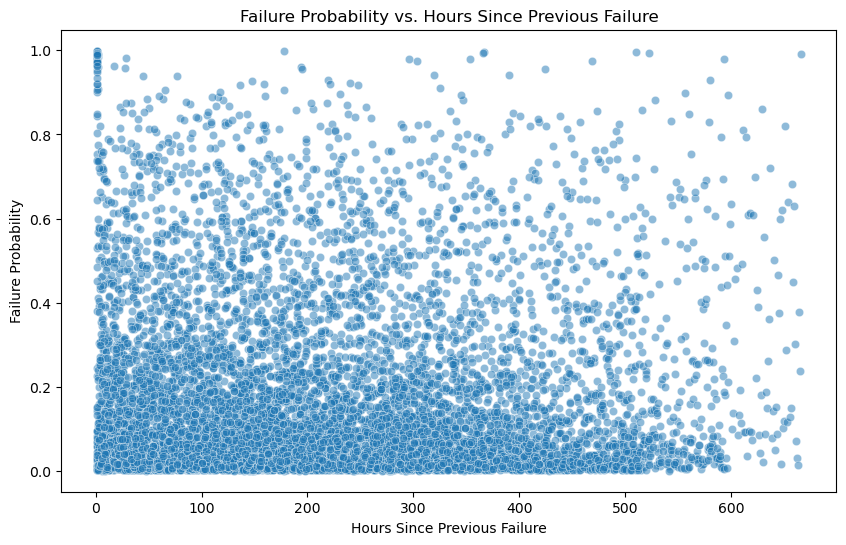

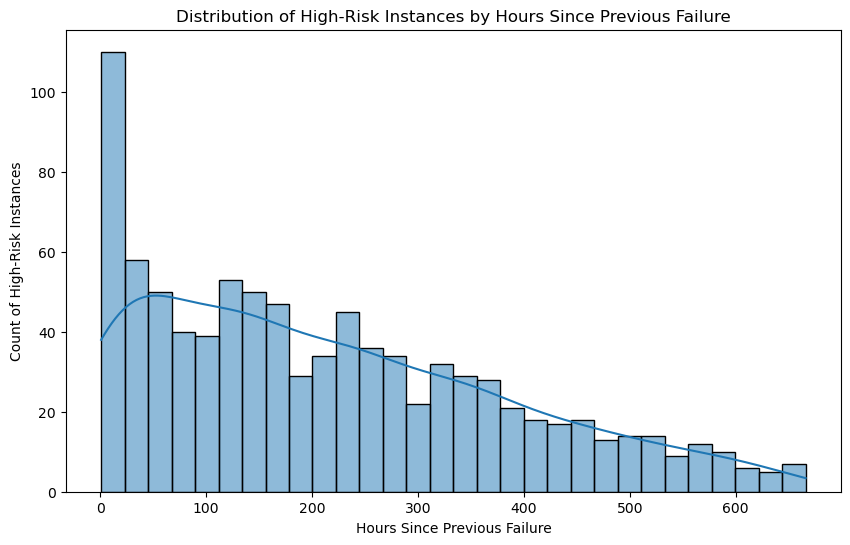

In [203]:
# Scatter plot of failure probability vs. hours since previous failure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours Since Previous Failure', y='Failure_Probability', data=df, alpha=0.5)
plt.xlabel('Hours Since Previous Failure')
plt.ylabel('Failure Probability')
plt.title('Failure Probability vs. Hours Since Previous Failure')
plt.show()

# Histogram of hours since previous failure for high-risk instances
critical_threshold = 0.5
high_risk_instances = df[df['Failure_Probability'] > critical_threshold]

plt.figure(figsize=(10, 6))
sns.histplot(high_risk_instances['Hours Since Previous Failure'], bins=30, kde=True)
plt.xlabel('Hours Since Previous Failure')
plt.ylabel('Count of High-Risk Instances')
plt.title('Distribution of High-Risk Instances by Hours Since Previous Failure')
plt.show()

#### Last but not least we determine Critical Ranges for Features I identify specific ranges of "Hours Since Previous Failure" and other features that indicate a high likelihood of failure:

Hours Since Previous Failure
1      48
2       9
3       6
4       3
5       3
       ..
651     1
654     1
657     1
659     1
666     1
Length: 456, dtype: int64


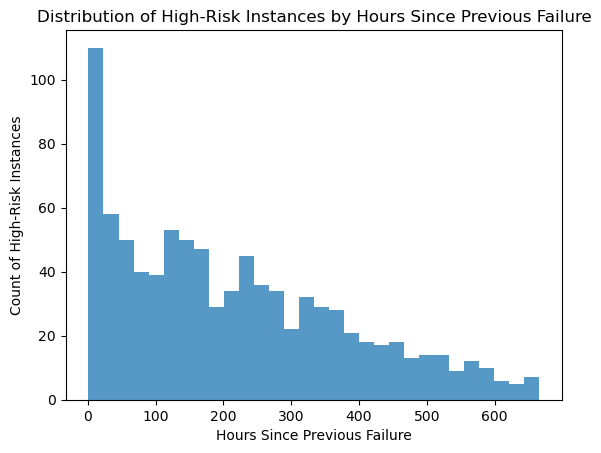

In [204]:
# Analyze high-risk instances to determine critical ranges
critical_ranges = high_risk_instances.groupby('Hours Since Previous Failure').size()
print(critical_ranges)

# Plot critical ranges
plt.hist(high_risk_instances['Hours Since Previous Failure'], bins=30, alpha=0.75)
plt.xlabel('Hours Since Previous Failure')
plt.ylabel('Count of High-Risk Instances')
plt.title('Distribution of High-Risk Instances by Hours Since Previous Failure')
plt.show()